In [1]:
# numerical computation
import numpy as np

# data processing/manipulation
import pandas as pd
pd.options.mode.chained_assignment = None
import re

# data visualization
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px

# stopwords, tokenizer, stemmer
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

# spell correction, lemmatization
from textblob import TextBlob
from textblob import Word

# sklearn
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('transcripts.csv')

In [3]:
df.head()

,Unnamed: 0,host,date,transcript,title,url,datetime,year
0,0,Rachel Maddow,01/31/19 09:00 PM,"Watch Videos RACHEL MADDOW, MSNBC HOST: There ...",\n Investigations scrutinizing NRA’s Russia c...,http://www.msnbc.com/transcripts/rachel-maddow...,2019-01-31 21:00:00,2019.0
1,1,Rachel Maddow,01/30/19 09:00 PM,"Watch Videos CHRIS HAYES, MSNBC HOST: Yes. The...",\n Republicans wait to nominate members. TRAN...,http://www.msnbc.com/transcripts/rachel-maddow...,2019-01-30 21:00:00,2019.0
2,2,Rachel Maddow,01/29/19 09:00 PM,"Watch Videos CHRIS HAYES, MSNBC HOST: Michelle...",\n Roger Stone pleads not guilty to felony ch...,http://www.msnbc.com/transcripts/rachel-maddow...,2019-01-29 21:00:00,2019.0
3,3,Rachel Maddow,01/28/19 09:00 PM,"Watch Videos CHRISTINA GREER, PROFESSOR OF POL...","\n 20,000 show up for Harris campaign launch....",http://www.msnbc.com/transcripts/rachel-maddow...,2019-01-28 21:00:00,2019.0
4,4,Rachel Maddow,01/25/19 09:00 PM,"Watch Videos MICHAEL STEELE, MSNBC POLITICAL A...",\n Trump campaign chair could face more time ...,http://www.msnbc.com/transcripts/rachel-maddow...,2019-01-25 21:00:00,2019.0


In [4]:
df = df.drop(columns = ['Unnamed: 0', 'date', 'title', 'url', 'datetime', 'year', 'host'])

In [5]:
df.head()

,transcript
0,"Watch Videos RACHEL MADDOW, MSNBC HOST: There ..."
1,"Watch Videos CHRIS HAYES, MSNBC HOST: Yes. The..."
2,"Watch Videos CHRIS HAYES, MSNBC HOST: Michelle..."
3,"Watch Videos CHRISTINA GREER, PROFESSOR OF POL..."
4,"Watch Videos MICHAEL STEELE, MSNBC POLITICAL A..."


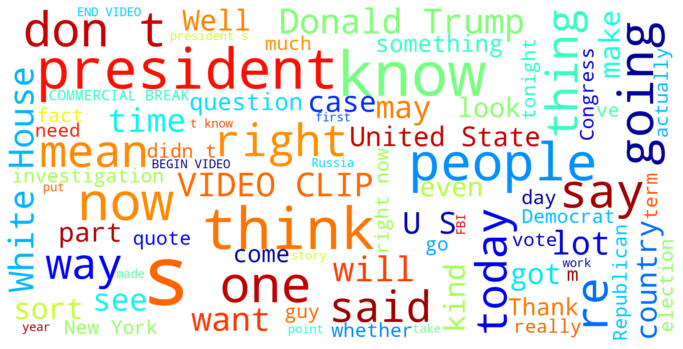

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df['transcript'][0:1000])

In [ ]:
to_remove = r'\d+|http?\S+|[^A-Za-z0-9]+'
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Function to preprocess transcript 
def clean_transcript(transcript, stem=False, lemmatize=False):

    # Make all text lowercase
    transcript = transcript.lower()
    
    # Remove links, special characters, punctuation, numbers, etc.
    transcript = re.sub(to_remove, ' ', transcript)
        
    filtered_transcript = []
    words = word_tokenize(transcript) 

    # Remove stopwords and stem
    for word in words:
        if not word in stop_words:
            if stem:
                filtered_transcript.append(ps.stem(word))
            elif lemmatize:
                filtered_transcript.append(Word(word).lemmatize())
            else:
                filtered_transcript.append(word)
            
    return filtered_transcript

In [ ]:
# Filtering transcript by applying cleantranscript()
df.transcript = df.transcript.apply(lambda x: clean_transcript(x))